# Import Libraries

In [1]:
import rasterio
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LightSource

# Import Raster DEM data for training

In [2]:
# Read in Rasters
#GroundTruth = rasterio.open('DEM/MBKM_Improvement/Accuracy_Data/Ground_Truth/rogens10_33_119_124.tif') # Vinstre
#GroundTruth = rasterio.open('DEM/MBKM_Improvement/Accuracy_Data/Ground_Truth/rogens10_33_129_130.tif') # Femundsmarka
GroundTruth = rasterio.open('DEM/MBKM_Improvement/Accuracy_Data/Ground_Truth/rogens10_33_167_188.tif') # Karasjok
GTarr = GroundTruth.read(1)

#MBKM = rasterio.open('DEM/MBKM_Improvement/Accuracy_Assessment/Vinstre/Vinstre_IT36.tif')
#MBKM = rasterio.open('DEM/MBKM_Improvement/Accuracy_Assessment/Femundsmarka/Femundsmarka_IT36.tif') # Femundsmarka
MBKM = rasterio.open('DEM/MBKM_Improvement/Accuracy_Assessment/Karasjok/Karasjok_IT36.tif') # Karasjok
MBKMarr = MBKM.read(1)

In [3]:
# Dataframes

df = pd.DataFrame()
df['GT'] = GTarr.flatten()
df['OUTPUT'] = MBKMarr.flatten()

In [4]:
# True Negative & Positive
TNgdf = df.where((df['GT'] == 0) & (df['OUTPUT'] == 0)) # Where both are 0, keep array and replace else with NaN
TPgdf = df.where((df['GT'] == 1) & (df['OUTPUT'] == 1))

# False Negative & Positive
FNgdf = df.where((df['GT'] == 1) & (df['OUTPUT'] == 0))
FPgdf = df.where((df['GT'] == 0) & (df['OUTPUT'] == 1))

# Add values
CTN = TNgdf.count()
CTP = TPgdf.count()
CFN = FNgdf.count()
CFP = FPgdf.count()

# Calculate F-Score
fscore = (2*CTP)/((2*CTP) + CFP + CFN)

# Calculate Accuracy Score
ACC = (CTP + CTN) / (CTP + CFN + CFP + CTN)

# Calculate Recall Score (Sensitivity)
RE = CTP / (CTP+CFN)

# Calculate Specificity Score
SPE = CTN / (CTN + CFP)

# Calculate Balanced Accuracy
BA = .5*((CTP/(CTP+CFN))+(CTN/(CTN+CTP)))

In [5]:
TPZ = TPgdf.replace(1, 1)
FPZ = FPgdf.replace(1, 2)
TNZ = TNgdf.replace(0, 3)
FNZ = FNgdf.replace(0, 4)

TPZ = TPZ.fillna(0)
FPZ = FPZ.fillna(0)
TNZ = TNZ.fillna(0)
FNZ = FNZ.fillna(0)

print('1 EQUALS TP')
print('2 EQUALS FP')
print('3 EQUALS TN')
print('4 EQUALS FN')

1 EQUALS TP
2 EQUALS FP
3 EQUALS TN
4 EQUALS FN


In [6]:
# Next step - export true positive and false negative maps
TP = TPgdf['OUTPUT']
TPIL = TPgdf.iloc[:,1:].values
TPRS = TPIL.reshape(GTarr[:,:].shape)

FP = FPgdf['OUTPUT']
FPIL = FPgdf.iloc[:,1:].values
FPRS = FPIL.reshape(GTarr[:,:].shape)

TN = TNgdf['OUTPUT']
TNIL = TNgdf.iloc[:,1:].values
TNRS = TNIL.reshape(GTarr[:,:].shape)

FN = FNgdf['OUTPUT']
FNIL = FNgdf.iloc[:,1:].values
FNRS = FNIL.reshape(GTarr[:,:].shape)


[[3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]
 ...
 [3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]]


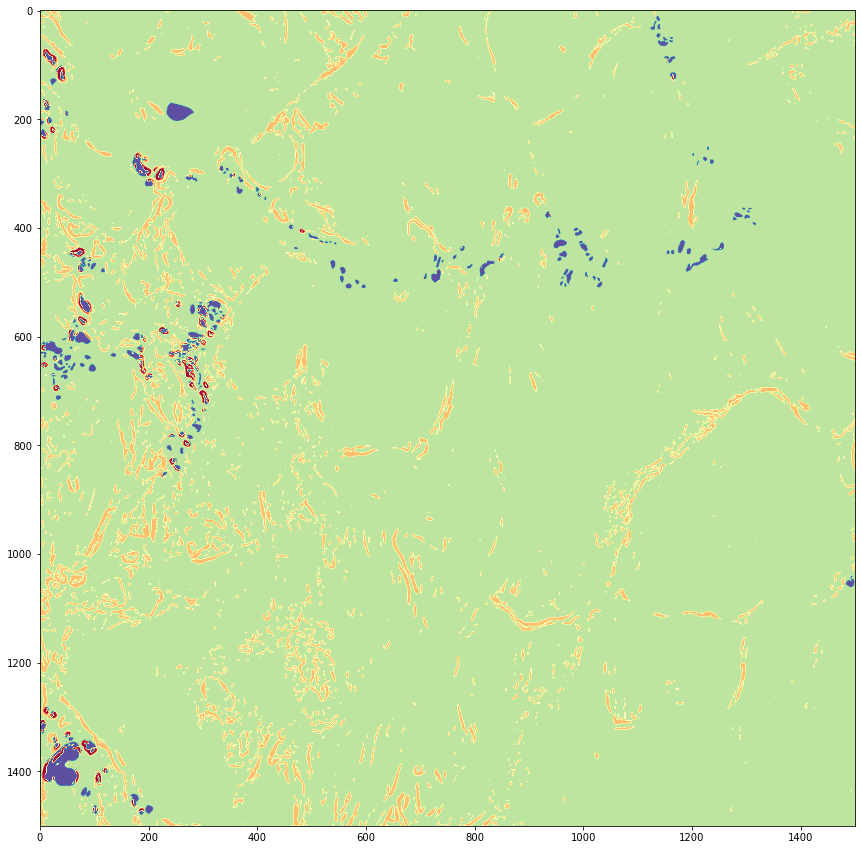

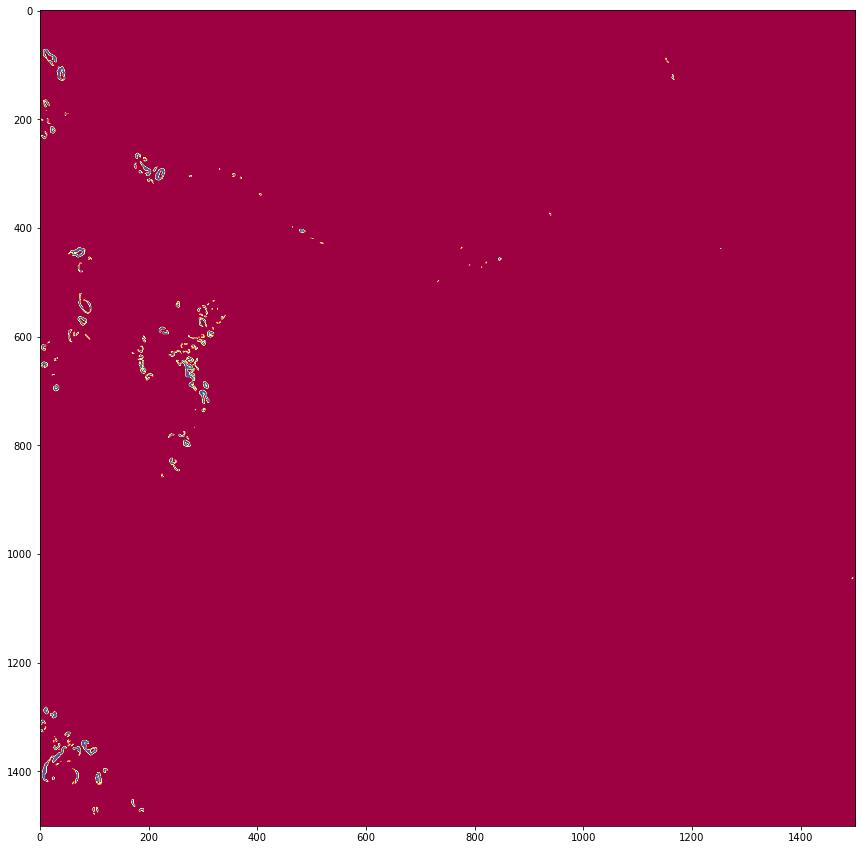

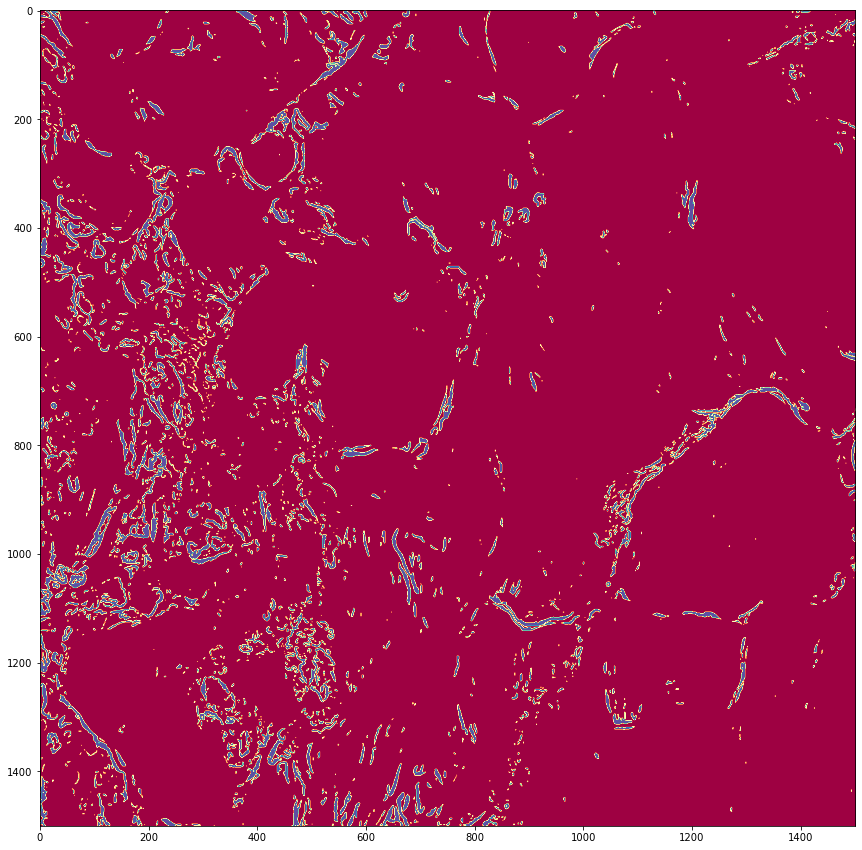

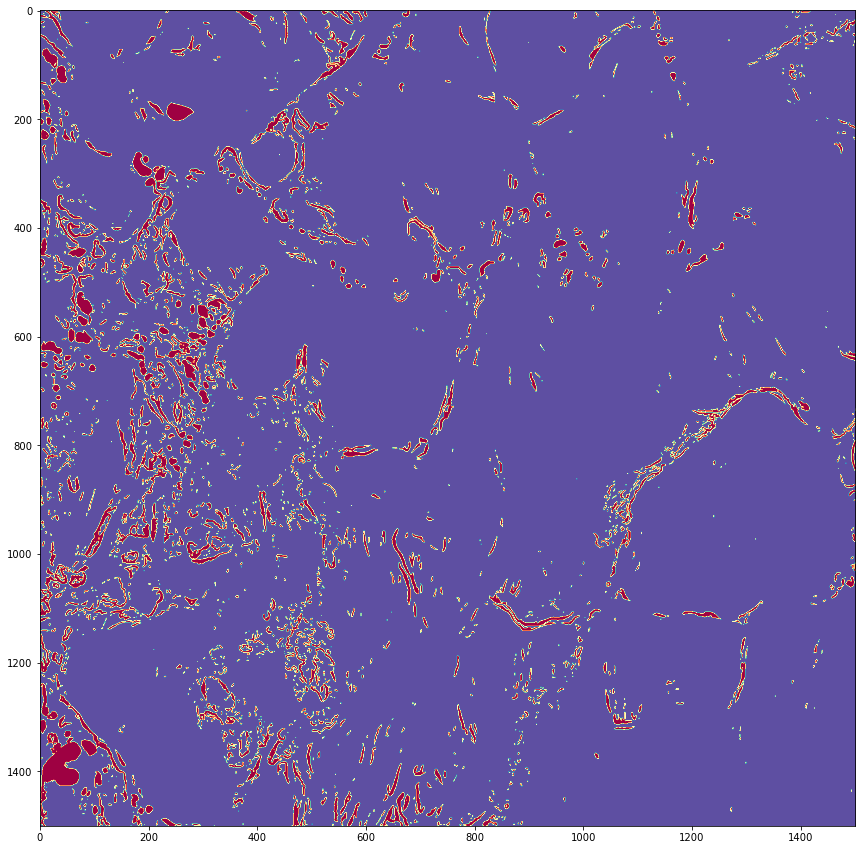

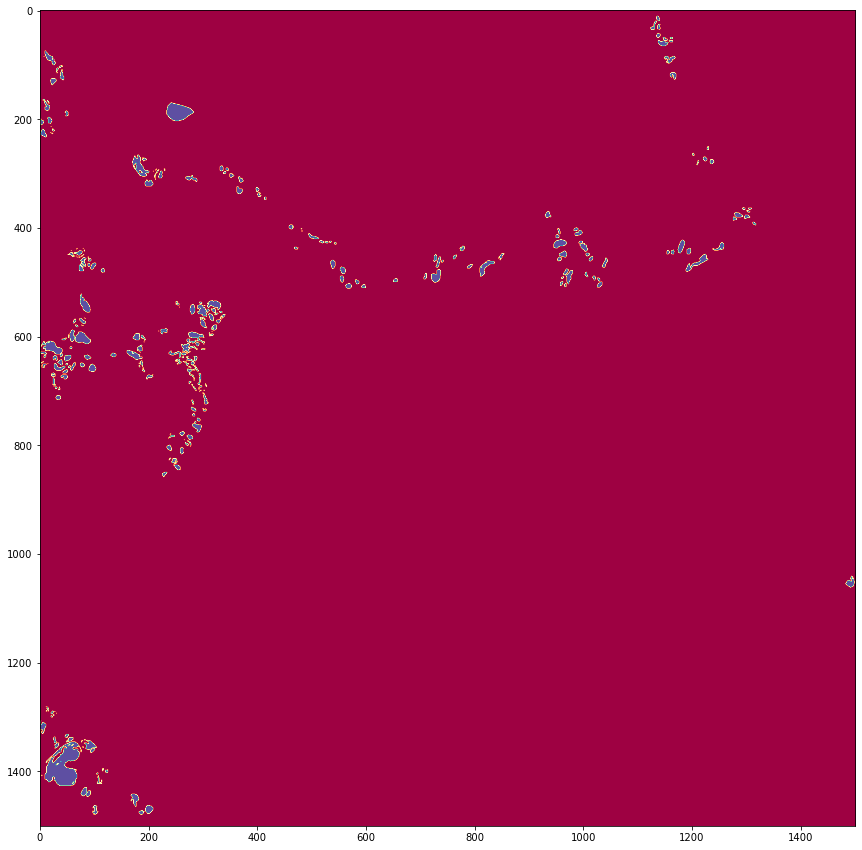

In [7]:
TPZs = TPZ['OUTPUT']
TPILZs = TPZ.iloc[:,1:].values
TPRSZs = TPILZs.reshape(GTarr[:,:].shape)

FPZs = FPZ['OUTPUT']
FPILZs = FPZ.iloc[:,1:].values
FPRSZs = FPILZs.reshape(GTarr[:,:].shape)

TNZs = TNZ['OUTPUT']
TNILZs = TNZ.iloc[:,1:].values
TNRSZs = TNILZs.reshape(GTarr[:,:].shape)

FNZs = FNZ['OUTPUT']
FNILZs = FNZ.iloc[:,1:].values
FNRSZs = FNILZs.reshape(GTarr[:,:].shape)

ACCURACYMAP = TPRSZs + FPRSZs + TNRSZs + FNRSZs

print(ACCURACYMAP)

plt.figure(figsize=(15,15))
plt.imshow(ACCURACYMAP, plt.cm.Spectral)
plt.title = ('ACCURACY MAP')


plt.figure(figsize=(15,15))
plt.imshow(TPRSZs, plt.cm.Spectral)
plt.title = ('TP')


plt.figure(figsize=(15,15))
plt.imshow(FPRSZs, plt.cm.Spectral)
plt.title = ('FP')


plt.figure(figsize=(15,15))
plt.imshow(TNRSZs, plt.cm.Spectral)
plt.title = ('TN')


plt.figure(figsize=(15,15))
plt.imshow(FNRSZs, plt.cm.Spectral)
plt.title = ('FN')

In [8]:
#Export

# Accuracy Final Map
GroundTruth.transform
ACC_OUT = rasterio.open('DEM/MBKM_Improvement/Accuracy_Maps/IT36_Karasjok.tif', 'w', driver='GTiff',
                            height = GTarr.shape[0], width = GTarr.shape[1],
                            count=1, dtype=str(GTarr.dtype), crs={'init': 'EPSG:3045'},
                            transform = GroundTruth.transform)
ACC_OUT.write(ACCURACYMAP, 1)
ACC_OUT.close()

In [9]:
print('TP', CTP)
print('\n')
print('TN', CTN)
print('\n')
print('FP', CFP)
print('\n')
print('FN', CFN)
print('\n')
print('ACC', ACC)
print('\n')
print('SENS', RE)
print('\n')
#print('SPEC', SPE)
#print('\n')
print('F', fscore)
print('\n')
print('BA', BA)
print('\n')

TP GT        6108
OUTPUT    6108
dtype: int64


TN GT        2118485
OUTPUT    2118485
dtype: int64


FP GT        109476
OUTPUT    109476
dtype: int64


FN GT        18932
OUTPUT    18932
dtype: int64


ACC GT        0.943006
OUTPUT    0.943006
dtype: float64


SENS GT        0.24393
OUTPUT    0.24393
dtype: float64


F GT        0.08687
OUTPUT    0.08687
dtype: float64


BA GT        0.620527
OUTPUT    0.620527
dtype: float64


